In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

company = pd.read_csv(r"D:\Nishanth ML Project\1000_Companies.csv")

company.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [2]:
company.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<AxesSubplot:>

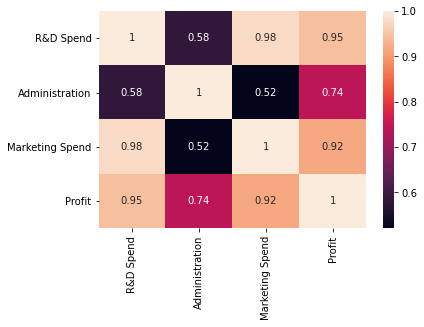

In [5]:
sns.heatmap(company.corr(), annot = True)

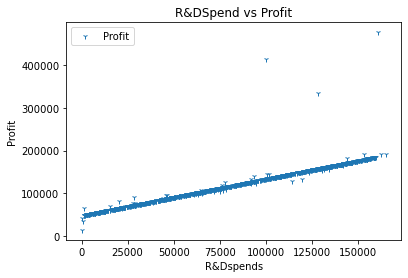

In [7]:
company.plot(x = 'R&D Spend', y = 'Profit', style = '1')
plt.title('R&DSpend vs Profit')
plt.xlabel('R&Dspends')
plt.ylabel('Profit')
plt.show()

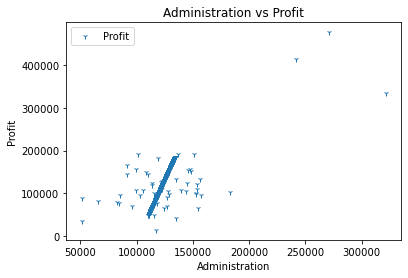

In [8]:
company.plot(x = 'Administration', y = 'Profit', style = '1')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

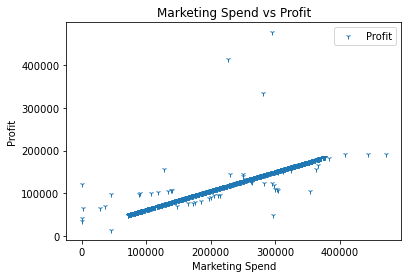

In [9]:
company.plot(x = 'Marketing Spend', y = 'Profit', style = '1')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [10]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [12]:
company.describe(include = 'all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,344,NaN
mean,81668.927200,122963.897612,226205.058419,NaN,119546.164656
std,46537.567891,12613.927535,91578.393542,NaN,42888.633848
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,43084.500000,116640.684850,150969.584600,NaN,85943.198543
50%,79936.000000,122421.612150,224517.887350,NaN,117641.466300
75%,124565.500000,129139.118000,308189.808525,NaN,155577.107425


In [40]:
X = company.iloc[:, :-1].values

In [41]:
y = company.iloc[:, 4].values


In [42]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("State",OneHotEncoder(),[3])], remainder= 'passthrough')
X = ct.fit_transform(X)
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
print([X])

[array([[0.0, 0.0, 1.0, 996, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 995, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 947, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 601, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 775, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 994, 270939.86, 295442.17]], dtype=object)]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [46]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([ 89209.29712496,  87425.46222148,  94331.95715479, 176518.10021383,
        82378.85866042, 111595.66195457, 134266.46250268,  90882.06980048,
       164223.49472887,  53184.69772557,  66656.9406336 , 149124.74103709,
       126459.34208734,  59031.71115915, 178314.39292755,  74877.84695839,
       118903.48496647, 163768.91958137, 173405.29298003, 182761.3200452 ,
       123713.7191151 ,  84494.83905175, 181239.82498199,  82968.79575704,
       105267.72962793, 100697.88747752,  55801.46111257,  56752.26018672,
        68439.06588912, 211955.50629929, 121090.55875931, 112522.1577683 ,
       101573.39260659, 136584.4668745 ,  63308.94939498, 109627.13044847,
       186834.78965118, 171998.41051963, 175681.86812277, 118339.36371242,
        96432.6140469 , 164945.20098842, 108507.08061171,  50222.70533075,
       117209.34043017,  58332.97123867, 157092.20461673,  77821.21086508,
       158691.93309666, 130911.43463263, 185208.24028126, 175586.07493639,
        93530.25248636,  

In [47]:
print(regressor.intercept_)

-67699.26877918767


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9310194894359526